<h1 style = "font-size:3rem;color:orange">Saratoga Houses</h1>

- https://github.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/blob/master/data/SaratogaHouses.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from fitter import Fitter


In [2]:
url = (
    "https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/"
    "master/data/SaratogaHouses.csv"
)
data = pd.read_csv(url, sep=',')

data.columns = ['precio', 'metros_totales', 'antiguedad', 'precio_terreno', 'metros_habitables',
                'universitarios', 'dormitorios', 'chimenea', 'banyos', 'habitaciones', 'calefaccion',
                'consumo_calefaccion', 'desague', 'vistas_lago', 'nueva_construccion', 'aire_acondicionado']

In [3]:
display(data.sample(8))
print("\nDimensiones:", data.shape)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefaccion,desague,vistas_lago,nueva_construccion,aire_acondicionado
568,359770,0.16,1,62600,2592,57,3,0,3.0,8,hot air,gas,public/commercial,No,No,Yes
1424,320210,0.81,1,108900,2492,40,3,1,2.5,9,hot air,gas,public/commercial,No,Yes,No
1171,220000,2.03,30,10200,1532,36,3,1,1.5,8,electric,electric,septic,No,No,No
1076,180000,1.00,19,49300,1220,63,3,0,2.0,5,electric,electric,public/commercial,No,No,No
1365,348000,0.17,14,10200,1708,40,2,1,2.0,4,hot air,oil,public/commercial,No,No,Yes
1312,373735,0.53,1,233000,3163,64,4,1,2.5,10,hot air,gas,public/commercial,No,Yes,Yes
67,225000,0.50,12,15300,2428,52,4,1,2.5,11,hot air,gas,public/commercial,No,No,Yes
1137,112000,1.00,15,24500,1080,35,3,0,2.0,4,electric,electric,septic,No,No,No



Dimensiones: (1728, 16)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precio               1728 non-null   int64  
 1   metros_totales       1728 non-null   float64
 2   antiguedad           1728 non-null   int64  
 3   precio_terreno       1728 non-null   int64  
 4   metros_habitables    1728 non-null   int64  
 5   universitarios       1728 non-null   int64  
 6   dormitorios          1728 non-null   int64  
 7   chimenea             1728 non-null   int64  
 8   banyos               1728 non-null   float64
 9   habitaciones         1728 non-null   int64  
 10  calefaccion          1728 non-null   object 
 11  consumo_calefaccion  1728 non-null   object 
 12  desague              1728 non-null   object 
 13  vistas_lago          1728 non-null   object 
 14  nueva_construccion   1728 non-null   object 
 15  aire_acondicionado   1728 non-null   o

In [5]:
print(data.isna().sum())

precio                 0
metros_totales         0
antiguedad             0
precio_terreno         0
metros_habitables      0
universitarios         0
dormitorios            0
chimenea               0
banyos                 0
habitaciones           0
calefaccion            0
consumo_calefaccion    0
desague                0
vistas_lago            0
nueva_construccion     0
aire_acondicionado     0
dtype: int64


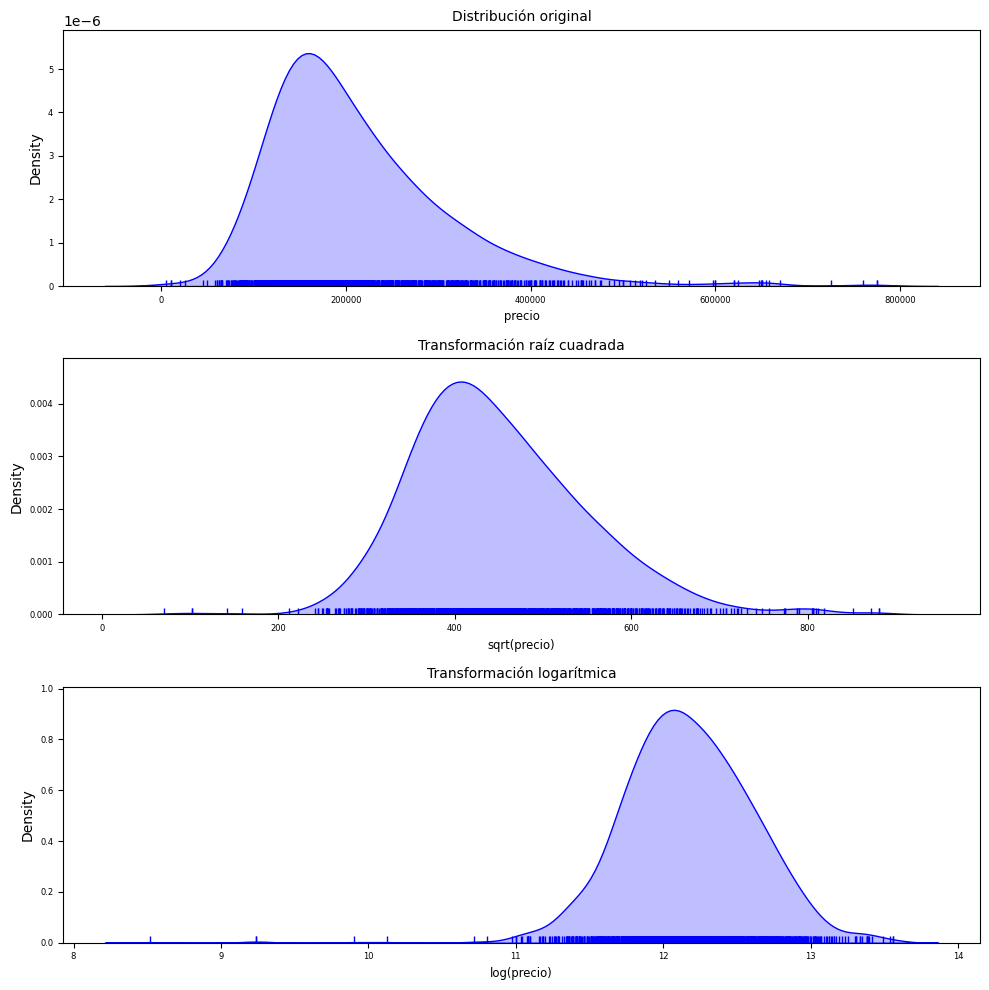

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
sns.kdeplot(
    data.precio,
    fill=True,
    color='blue',
    ax=axes[0]
)
sns.rugplot(
    data.precio,
    color='blue',
    ax=axes[0]
)
axes[0].set_title('Distribución original', fontsize='medium')
axes[0].set_xlabel('precio', fontsize='small')
axes[0].tick_params(labelsize=6)

sns.kdeplot(
    np.sqrt(data.precio),
    fill=True,
    color='blue',
    ax=axes[1]
)
sns.rugplot(
    np.sqrt(data.precio),
    color='blue',
    ax=axes[1]
)
axes[1].set_title('Transformación raíz cuadrada', fontsize='medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small')
axes[1].tick_params(labelsize=6)

sns.kdeplot(
    np.log(data.precio),
    fill=True,
    color='blue',
    ax=axes[2]
)
sns.rugplot(
    np.log(data.precio),
    color='blue',
    ax=axes[2]
)
axes[2].set_title('Transformación logarítmica', fontsize='medium')
axes[2].set_xlabel('log(precio)', fontsize='small')
axes[2].tick_params(labelsize=6)

fig.tight_layout()

In [7]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(data.precio, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

2024-03-18 14:52:50.559 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-03-18 14:52:50.571 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-18 14:52:50.606 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted logistic distribution with error=0.0)
2024-03-18 14:52:50.653 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.0)
2024-03-18 14:52:50.685 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.0)
2024-03-18 14:52:50.867 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.0)
2024-03-18 14:52:50.922 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.0)
2024-03-18 14:52:50.935 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,2.497420e-11,3068.852573,3090.671453,inf,0.051274,2.180145e-04
logistic,4.913880e-11,3147.967042,3158.876482,inf,0.071310,4.368626e-08
cauchy,5.221450e-11,2956.669693,2967.579133,inf,0.121728,9.001774e-23
chi2,5.835610e-11,3315.562140,3331.926300,inf,0.094392,7.513341e-14
norm,6.947514e-11,3324.534158,3335.443598,inf,0.104149,8.972690e-17
expon,2.915346e-10,2824.103160,2835.012600,inf,0.316530,2.028906e-154
powerlaw,3.132284e-10,2728.809479,2745.173639,inf,0.344929,3.981254e-184
exponpow,4.841645e-10,inf,inf,NaN,1.000000,0.000000e+00
gamma,4.841645e-10,inf,inf,3.958212,0.947917,0.000000e+00


In [8]:
data.select_dtypes(include=['float64', 'int']).describe()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


Text(0.5, 0.98, 'Distribución variables numéricas')

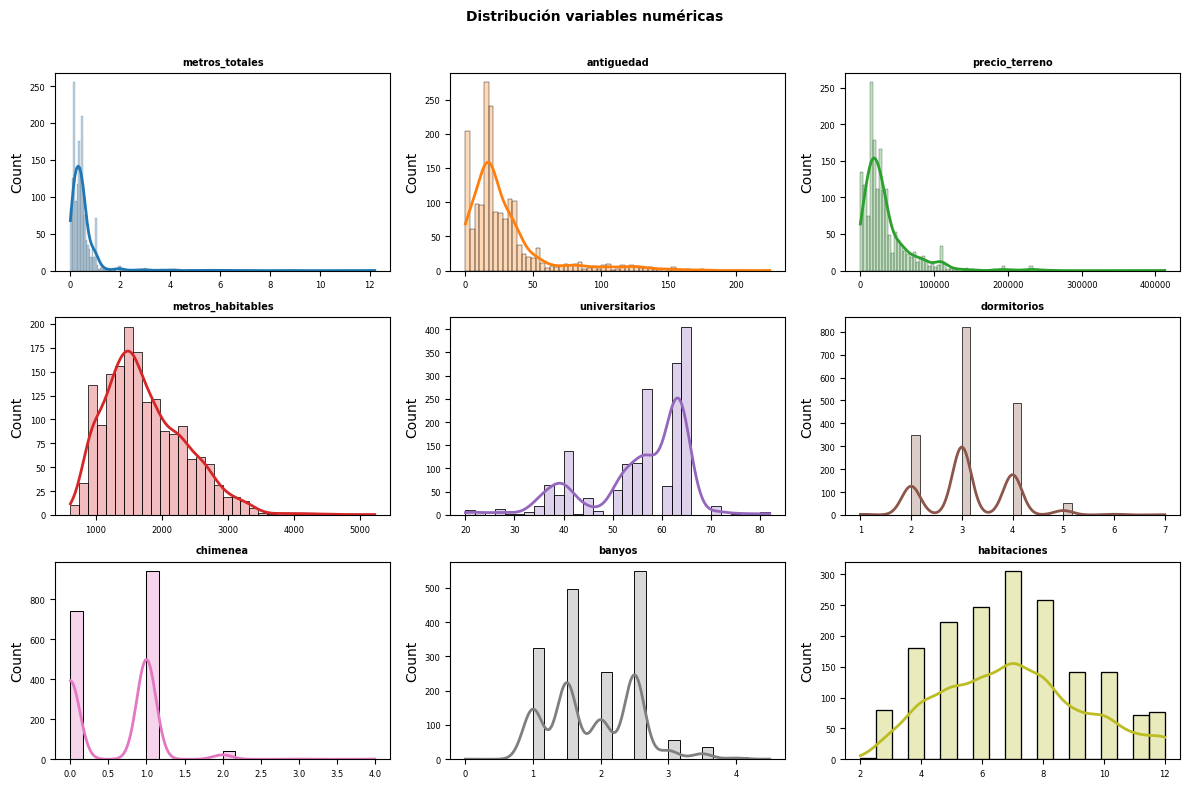

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, column in enumerate(columnas_numeric):
    sns.histplot(
        data=data,
        x=column,
        stat='count',
        kde=True,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws={'linewidth': 2},
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(column, fontsize=7, fontweight='bold')
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel('')

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight='bold')

In [10]:
data.chimenea.value_counts()

chimenea
1    942
0    740
2     42
4      2
3      2
Name: count, dtype: int64

In [11]:
data.chimenea = data.chimenea.astype('str')

Text(0.5, 0.98, 'Distribución variables numéricas')

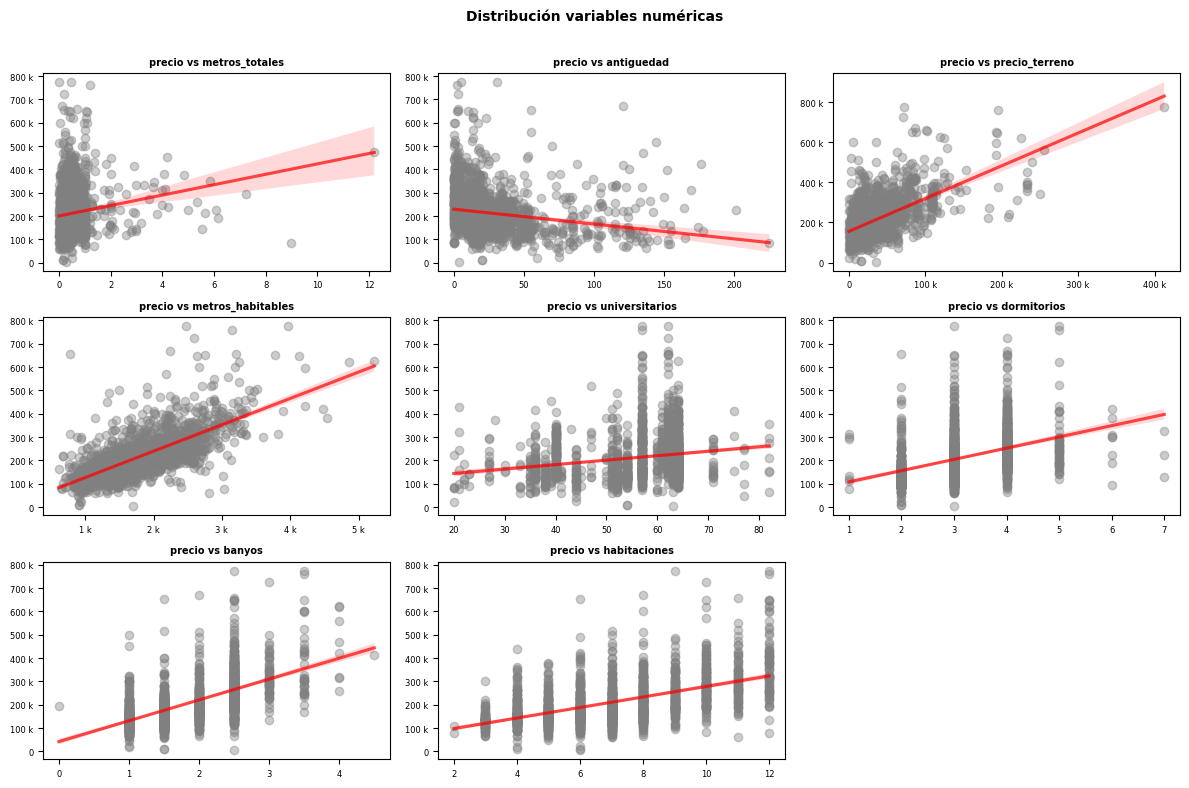

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, column in enumerate(columnas_numeric):
    sns.regplot(
        x=data[column],
        y=data['precio'],
        color='gray',
        scatter_kws={'alpha': 0.4},
        line_kws={'color': 'r', 'alpha': 0.7},
        ax=axes[i]
    )
    axes[i].set_title(f"precio vs {column}", fontsize=7, fontweight='bold')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for i in [8]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight='bold')

In [13]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1', 'variable_2', 'r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return corr_mat

corr_matrix = data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
44,metros_habitables,habitaciones,0.733666,0.733666
76,habitaciones,metros_habitables,0.733666,0.733666
67,banyos,metros_habitables,0.718564,0.718564
43,metros_habitables,banyos,0.718564,0.718564
36,metros_habitables,precio,0.712390,0.712390
4,precio,metros_habitables,0.712390,0.712390
78,habitaciones,dormitorios,0.671863,0.671863
62,dormitorios,habitaciones,0.671863,0.671863
42,metros_habitables,dormitorios,0.656196,0.656196
58,dormitorios,metros_habitables,0.656196,0.656196


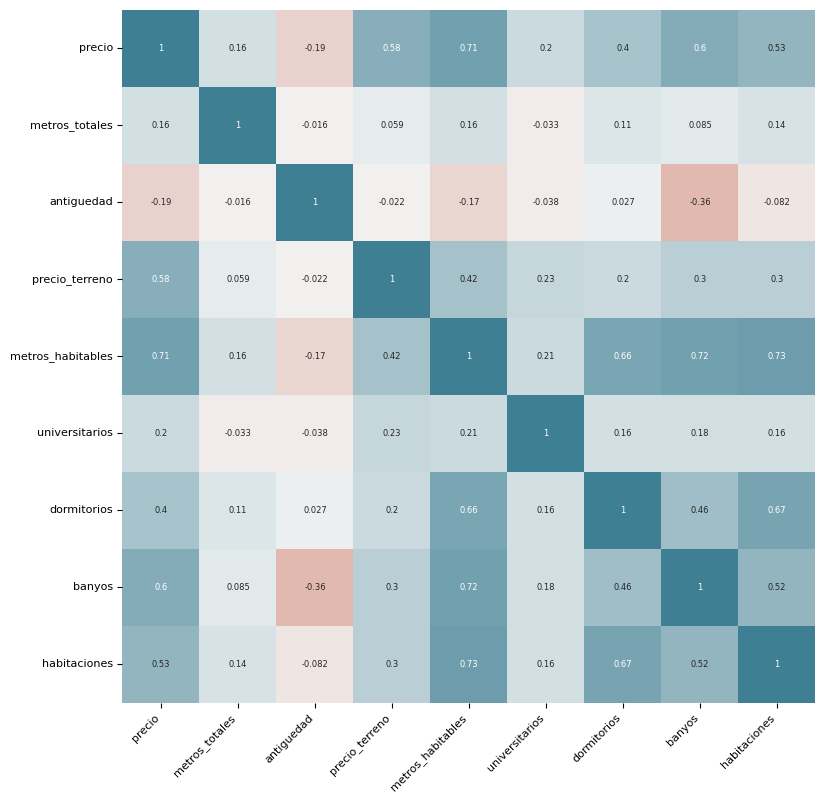

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))

sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=False,
    annot_kws={'size': 6},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

ax.tick_params(labelsize=8)

In [15]:
data.select_dtypes(include=['object']).describe()

,chimenea,calefaccion,consumo_calefaccion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,5,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


Text(0.5, 0.98, 'Distribución variables cualitativas')

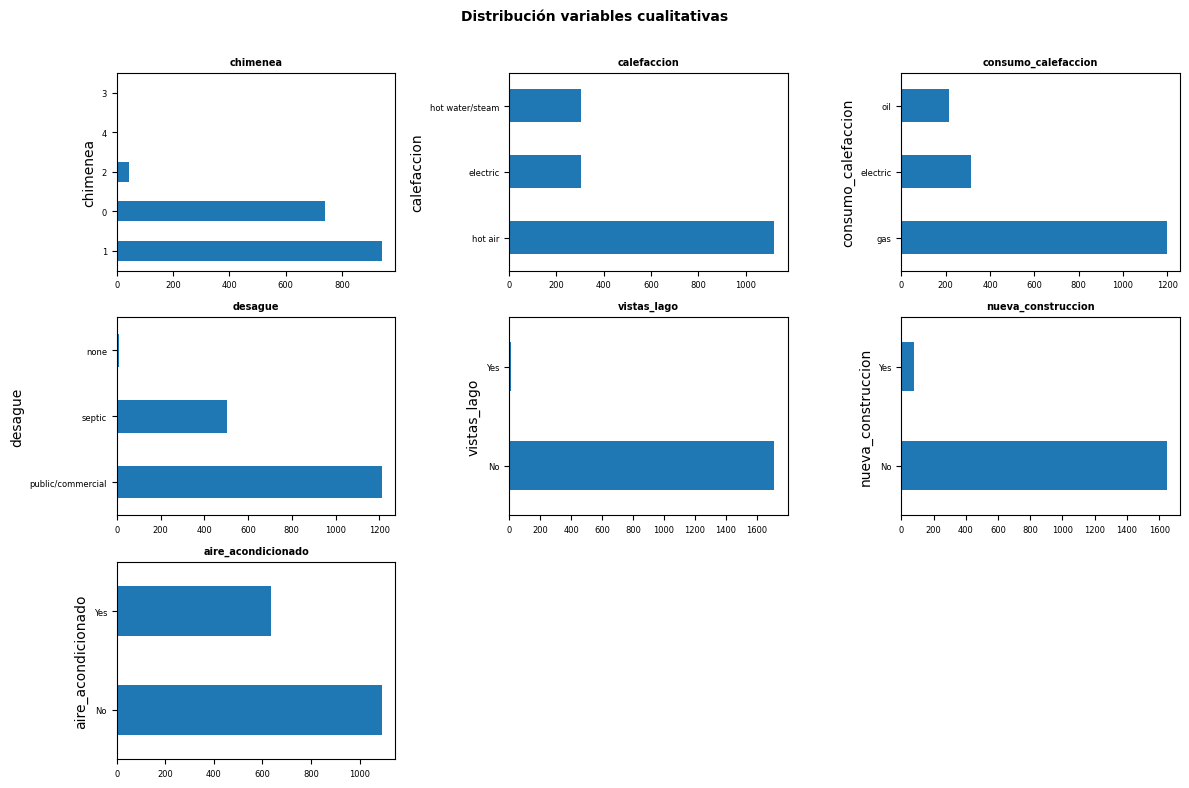

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns

for i, column in enumerate(columnas_object):
    data[column].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(column, fontsize=7, fontweight='bold')
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel('')

for i in [7, 8]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas', fontsize=10, fontweight='bold')

In [17]:
data.chimenea.value_counts().sort_index()

chimenea
0    740
1    942
2     42
3      2
4      2
Name: count, dtype: int64

In [18]:
dic_replace = {'2': '2_mas',
               '3': '2_mas',
               '4': '2_mas'}

data['chimenea'] = (
    data['chimenea']
    .map(dic_replace)
    .fillna(data['chimenea'])
)

In [19]:
data.chimenea.value_counts().sort_index()

chimenea
0        740
1        942
2_mas     46
Name: count, dtype: int64

Text(0.5, 0.98, 'Distribución variables numéricas')

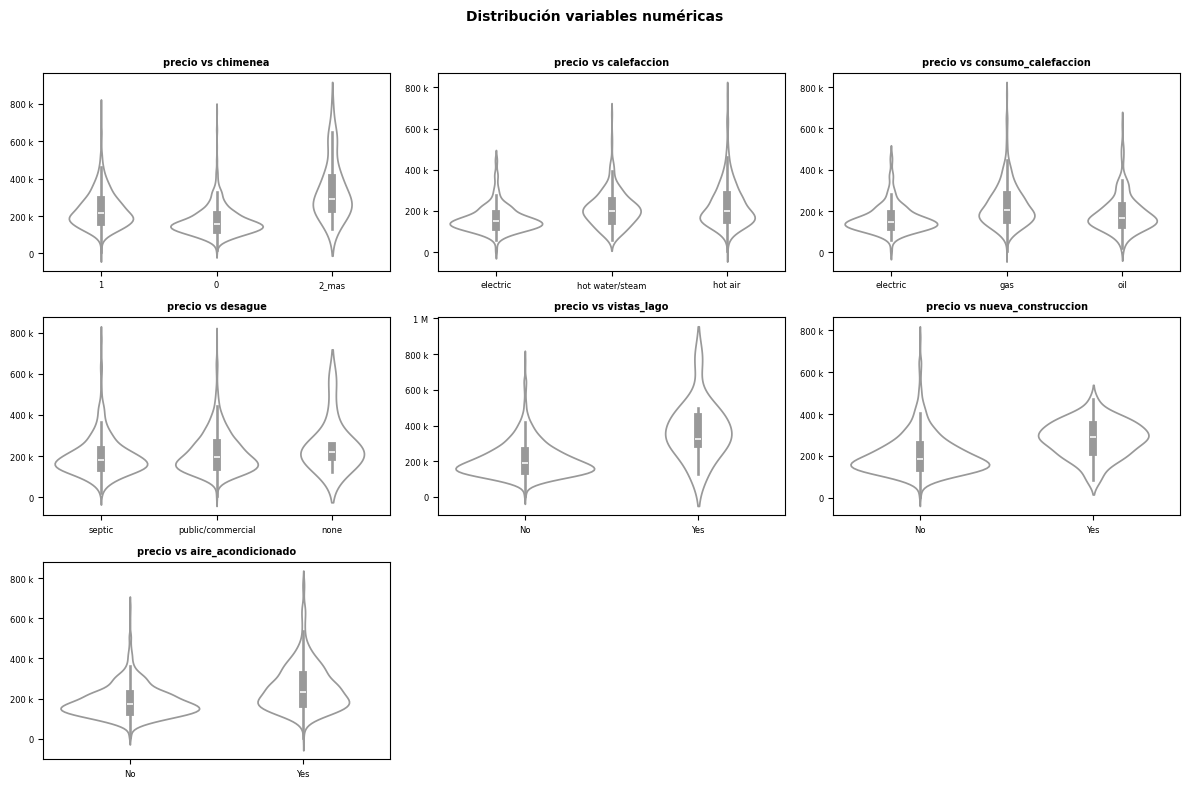

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns

for i, column in enumerate(columnas_object):
    sns.violinplot(
        x=column,
        y='precio',
        data=data,
        color='white',
        ax=axes[i]
    )
    axes[i].set_title(f"precio vs {column}", fontsize=7, fontweight='bold')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for i in [7, 8]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight='bold')

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('precio', axis='columns'),
    data['precio'],
    train_size=0.8,
    random_state=1234,
    shuffle=True
)

In [22]:
title = 'Partición de entrenamiento'
print(title + "\n" + len(title) * '-')
print(y_train.describe())

Partición de entrenamiento
--------------------------
count      1382.000000
mean     211436.516643
std       96846.639129
min       10300.000000
25%      145625.000000
50%      190000.000000
75%      255000.000000
max      775000.000000
Name: precio, dtype: float64


In [23]:
title = 'Partición de test'
print(title + "\n" + len(title) * '-')
print(y_test.describe())

Partición de test
-----------------
count       346.000000
mean     214084.395954
std      104689.155889
min        5000.000000
25%      139000.000000
50%      180750.000000
75%      271750.000000
max      670000.000000
Name: precio, dtype: float64


In [24]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
    [('scale', StandardScaler(), numeric_cols),
     ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
     remainder='passthrough'
)

In [25]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [26]:
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
nombre_columnas = np.concatenate([numeric_cols, encoded_cat])
X_train_prep = preprocessor.transform(X_train)
X_train_prep = pd.DataFrame(X_train_prep, columns=nombre_columnas)
X_train_prep.head(8)

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,chimenea_0,chimenea_1,...,consumo_calefaccion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
0,-0.061549,0.301597,-0.195148,1.320467,0.826826,1.011039,0.905289,2.128665,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.195573,-0.407560,-0.277982,0.194931,0.730235,1.011039,1.663079,1.264569,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.072475,-0.478476,-0.892092,-0.064313,-1.877728,1.011039,0.147500,-0.463623,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.121115,0.159766,-0.138022,0.254509,0.730235,-0.200805,-0.610289,-0.895671,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.523186,-0.974885,0.050496,0.484768,0.150688,-0.200805,0.905289,0.832521,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,-0.508295,-0.407560,-0.529339,-1.358921,-0.332268,-1.412649,-0.610289,-0.031575,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,0.266065,-0.407560,-0.409373,0.029079,-0.139086,1.011039,0.147500,-0.031575,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,-0.404054,-0.974885,0.233301,-0.864587,0.150688,-0.200805,0.147500,-0.895671,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [27]:
preprocessor = ColumnTransformer(
    [('scale', StandardScaler(), numeric_cols),
     ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)],
     remainder='passthrough',
     verbose_feature_names_out=False
).set_output(transform='pandas')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

X_train_prep.head(8)

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,chimenea_0,chimenea_1,...,consumo_calefaccion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
1571,-0.061549,0.301597,-0.195148,1.320467,0.826826,1.011039,0.905289,2.128665,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
832,-0.195573,-0.407560,-0.277982,0.194931,0.730235,1.011039,1.663079,1.264569,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1302,0.072475,-0.478476,-0.892092,-0.064313,-1.877728,1.011039,0.147500,-0.463623,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1068,-0.121115,0.159766,-0.138022,0.254509,0.730235,-0.200805,-0.610289,-0.895671,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
535,-0.523186,-0.974885,0.050496,0.484768,0.150688,-0.200805,0.905289,0.832521,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
257,-0.508295,-0.407560,-0.529339,-1.358921,-0.332268,-1.412649,-0.610289,-0.031575,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
489,0.266065,-0.407560,-0.409373,0.029079,-0.139086,1.011039,0.147500,-0.031575,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
618,-0.404054,-0.974885,0.233301,-0.864587,0.150688,-0.200805,0.147500,-0.895671,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [29]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)
X_train_prep.head(5)

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,chimenea_0,chimenea_1,...,consumo_calefaccion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
1571,-0.061549,0.301597,-0.195148,1.320467,0.826826,1.011039,0.905289,2.128665,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
832,-0.195573,-0.407560,-0.277982,0.194931,0.730235,1.011039,1.663079,1.264569,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1302,0.072475,-0.478476,-0.892092,-0.064313,-1.877728,1.011039,0.147500,-0.463623,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1068,-0.121115,0.159766,-0.138022,0.254509,0.730235,-0.200805,-0.610289,-0.895671,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
535,-0.523186,-0.974885,0.050496,0.484768,0.150688,-0.200805,0.905289,0.832521,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [30]:
from sklearn import set_config

set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefaccion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])],
                  verbose_feature_names_out=False)

In [31]:
set_config(display='text')

In [33]:
from sklearn.linear_model import Ridge

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')

pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

_ = pipe.fit(X=X_train, y=y_train)

In [36]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    estimator=pipe,
    X=X_train,
    y=y_train,
    scoring='neg_root_mean_squared_error',
    cv=5
)

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-53936.97817183 -53076.74364513 -62746.15219054 -65963.09754244
 -48929.66260476]
Media métricas de validación cruzada: -56930.52683094097


In [37]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
    estimator=pipe,
    X=X_train,
    y=y_train,
    scoring='neg_root_mean_squared_error',
    cv=cv
)

print(f"Métricas de validación cruzada: {cv_scores}")
print(f"\nMedia métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-66487.72274814 -56333.87119132 -48992.85039086 -55030.00923381
 -58790.48472729 -62651.67080028 -55779.2103529  -61820.5882113
 -57243.1819794  -48910.70385765 -50033.46929956 -51586.8240037
 -62478.2206031  -65111.86204296 -54900.98944223 -64220.39882006
 -53694.93490461 -64690.99877883 -51242.27642488 -52330.80605289
 -56777.05219272 -58644.60923875 -55573.25900549 -64350.25804164
 -50578.15339623]

Media métricas de validación cruzada: -57130.17622962478


In [38]:
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
    estimator=pipe,
    X=X_train,
    y=y_train,
    scoring=('r2', 'neg_root_mean_squared_error'),
    cv=cv,
    return_train_score=True
)

cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.008198,0.005004,0.632359,0.679758,-64605.636258,-51789.256510
1,0.007007,0.004504,0.718708,0.636812,-48322.428406,-59983.019196
2,0.007005,0.004504,0.595874,0.689939,-58434.926618,-55213.669996
3,0.007007,0.004503,0.672969,0.655316,-58179.173708,-55331.536238
4,0.006506,0.004504,0.615521,0.683390,-60148.310664,-54366.426683
5,0.006505,0.003503,0.650829,0.664771,-53812.579173,-57561.184588
6,0.006005,0.003503,0.698178,0.647441,-49813.241120,-59221.407345
7,0.006005,0.004004,0.646554,0.673016,-61749.477863,-53221.315710
8,0.006005,0.004005,0.615151,0.682999,-59192.994923,-54895.180113
9,0.006004,0.004508,0.645685,0.670425,-61061.033083,-53843.654748


Text(0.5, 0.98, 'Distribución error de validación cruzada')

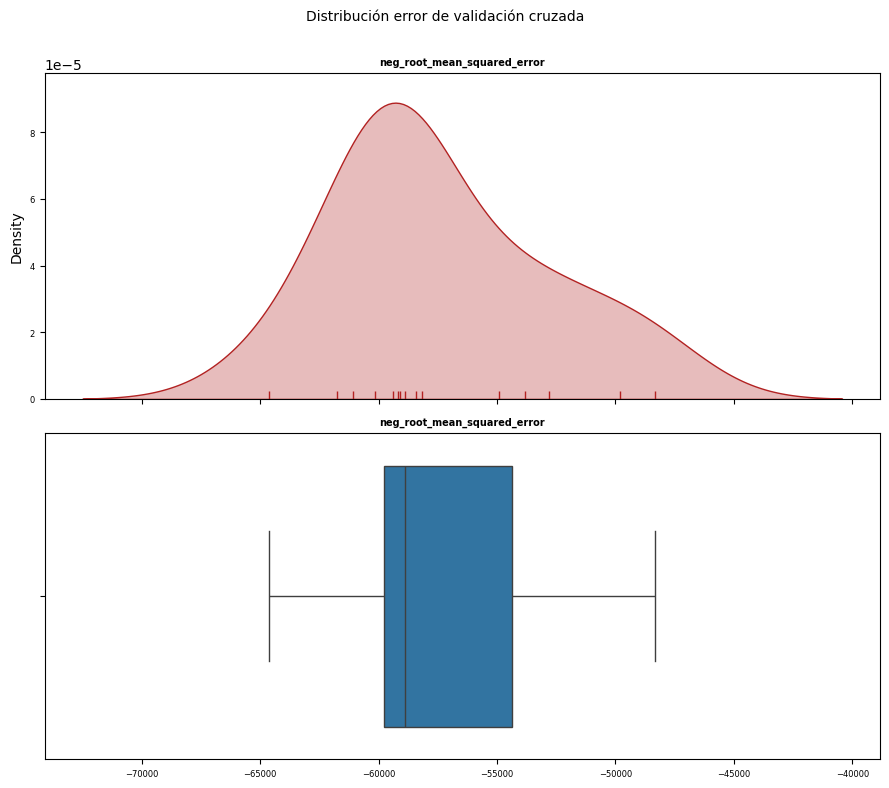

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 8), sharex=True)

sns.kdeplot(
    cv_scores['test_neg_root_mean_squared_error'],
    fill=True,
    alpha=0.3,
    color='firebrick',
    ax=axes[0]
)
sns.rugplot(
    cv_scores['test_neg_root_mean_squared_error'],
    color='firebrick',
    ax=axes[0]
)
axes[0].set_title('neg_root_mean_squared_error', fontsize=7, fontweight='bold')
axes[0].tick_params(labelsize=6)
axes[0].set_xlabel("")

sns.boxplot(
    x=cv_scores['test_neg_root_mean_squared_error'],
    ax=axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize=7, fontweight='bold')
axes[1].tick_params(labelsize=6)
axes[1].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize=10, fontweight=10)

C:\Users\pepel\AppData\Local\Temp\ipykernel_21260\2856087646.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot(
c:\Mis Proyectos\Git\Kaggle\Avalon\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 0.98, 'Diagnóstico residuos')

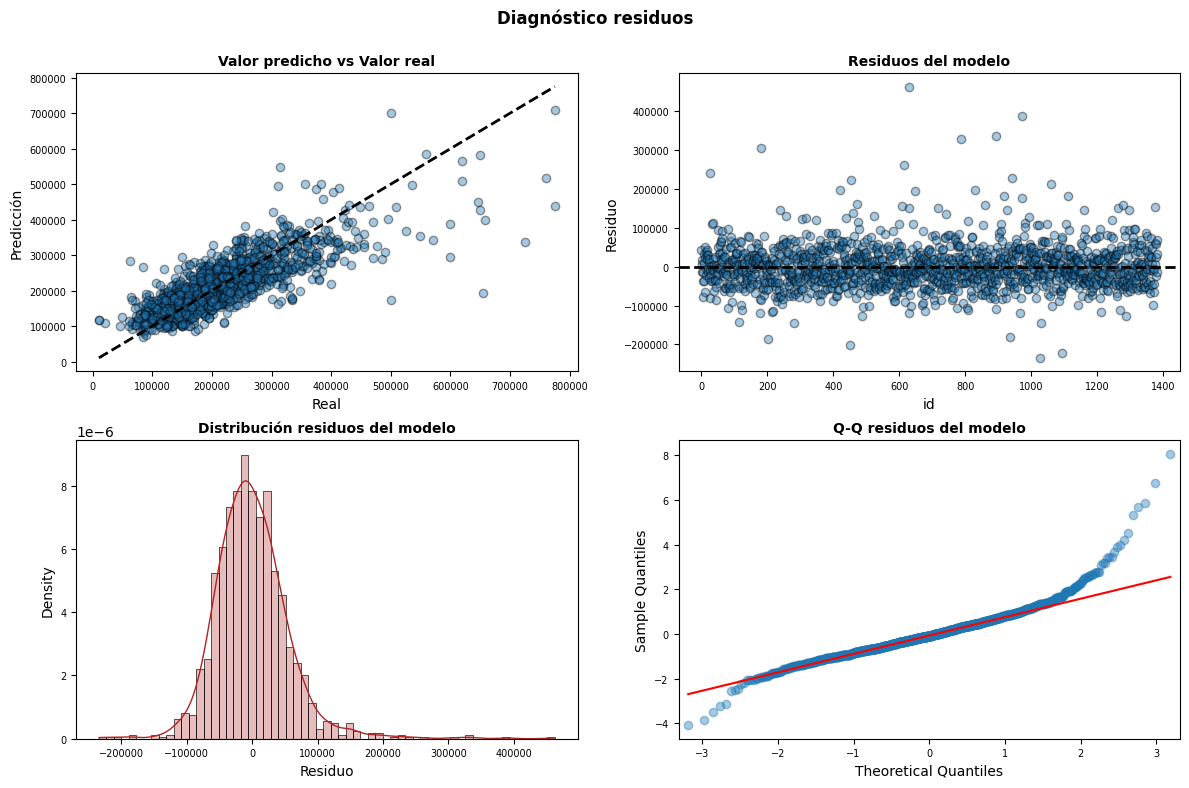

In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_predicciones = cross_val_predict(
    estimator=pipe,
    X=X_train,
    y=y_train,
    cv=cv
)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].scatter(y_train, cv_predicciones, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 0].plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    'k--', color='black', lw=2
)
axes[0, 0].set_title('Valor predicho vs Valor real', fontsize=10, fontweight='bold')
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize=7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_predicciones,
                   edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize=10, fontweight='bold')
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize=7)

sns.histplot(
    data=y_train - cv_predicciones,
    stat='density',
    kde=True,
    line_kws={'linewidth': 1},
    color='firebrick',
    alpha=0.3,
    ax=axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

sm.qqplot(
    y_train - cv_predicciones,
    fit=True,
    line='q',
    ax=axes[1, 1],
    color='firebrick',
    alpha=0.4,
    lw=2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12, fontweight='bold')

In [42]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
    estimator=pipe,
    X=X_train,
    y=y_train,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1
)

print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Media métricas de validación cruzada: -56735.77500472445


In [43]:
predicciones = pipe.predict(X_test)

In [44]:
df_predicciones = pd.DataFrame({'precio': y_test, 'prediccion': predicciones})
df_predicciones.head()

,precio,prediccion
903,105000,112491.665253
208,113000,185142.195564
358,110500,168900.516039
1187,159000,139333.302565
319,215000,236967.476884


In [45]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
    y_true=y_test,
    y_pred=predicciones,
    squared=False
)
rmse

c:\Mis Proyectos\Git\Kaggle\Avalon\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


65372.91638923963

In [46]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

In [ ]:
import multiprocessing

param_grid = {'modelo__alpha': np.logspace(-5, 3, 10)}

grid = GridSearchCV(
        estimator  = pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        return_train_score = True
       )

_ = grid.fit(X = X_train, y = y_train)

In [49]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
6,2.154435,-57119.810985,3652.673843,-55919.283273,915.539984
5,0.278256,-57159.846492,3701.709219,-55906.511073,916.714351
4,0.035938,-57167.709150,3709.557103,-55906.249306,916.739365
3,0.004642,-57168.780589,3710.601640,-55906.244813,916.739797
2,0.000599,-57168.919933,3710.737078,-55906.244738,916.739804
1,0.000077,-57168.937946,3710.754580,-55906.244737,916.739804
0,0.00001,-57168.940273,3710.756840,-55906.244737,916.739804
7,16.681005,-57193.440576,3525.907521,-56178.737313,896.893448
8,129.154967,-58061.214683,3524.862891,-57367.155262,864.646861
9,1000.0,-62659.700966,4153.856778,-62391.216461,880.205339


In [50]:
title = "Mejores hiperparámetros encontrados"
print(title + "\n" + len(title) * '-' + "\n")
print(f"{grid.best_params_} : {grid.best_score_} ({grid.scoring})")

Mejores hiperparámetros encontrados
-----------------------------------

{'modelo__alpha': 2.154434690031882} : -57119.81098491528 (neg_root_mean_squared_error)


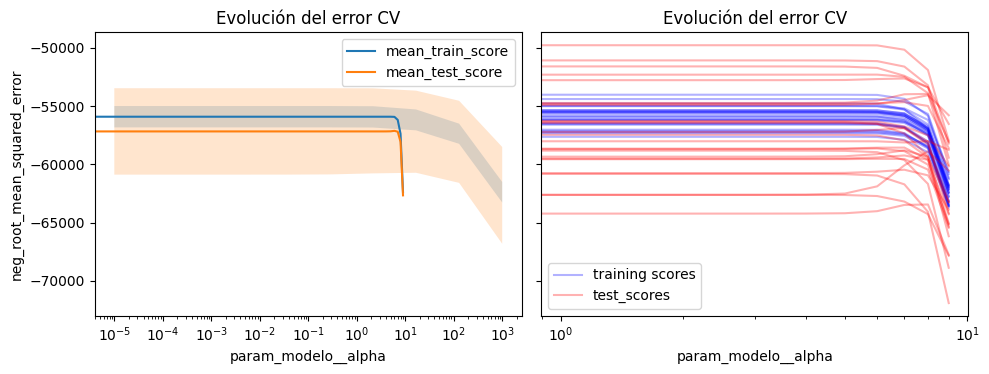

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.84), sharey=True)

# Gráfico 1
# ------------------------------------------------------------------------------
resultados.plot('param_modelo__alpha', 'mean_train_score', ax=axes[0])
resultados.plot('param_modelo__alpha', 'mean_test_score', ax=axes[0])
axes[0].fill_between(resultados.param_modelo__alpha.astype(float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
axes[0].fill_between(resultados.param_modelo__alpha.astype(float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_title('Evolución del error CV')
axes[0].set_ylabel('neg_root_mean_squared_error')

# Gráfico 2
# ------------------------------------------------------------------------------
numero_splits = grid.n_splits_

resultados.plot(
    x     = 'param_modelo__alpha',
    y     = [f'split{i}_train_score' for i in range(numero_splits)],
    alpha = 0.3,
    c     = 'blue', 
    ax    = axes[1]
)

resultados.plot(
    x     = 'param_modelo__alpha',
    y     = [f'split{i}_test_score' for i in range(numero_splits)],
    alpha = 0.3,
    c     = 'red', 
    ax    = axes[1]
)

axes[1].legend(
    (axes[1].get_children()[0], axes[1].get_children()[numero_splits]),
    ('training scores', 'test_scores')
)
axes[1].set_xscale('log')
axes[1].set_title('Evolución del error CV')
axes[1].set_ylabel('neg_root_mean_squared_error')

fig.tight_layout()

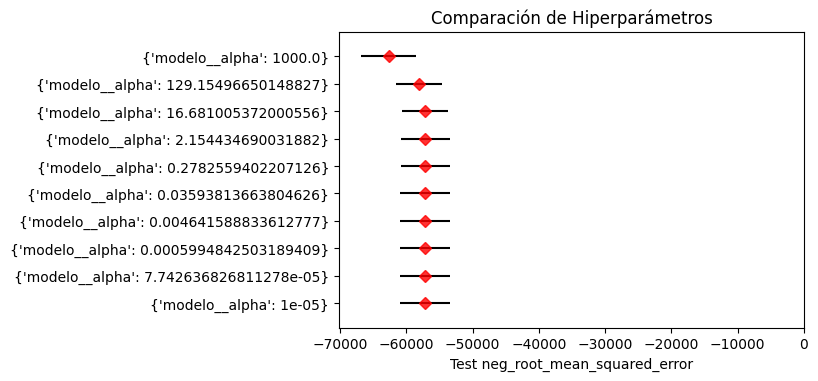

In [55]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_xlabel('Test neg_root_mean_squared_error');

Text(0.5, 1.0, 'Distribución aleatoria')

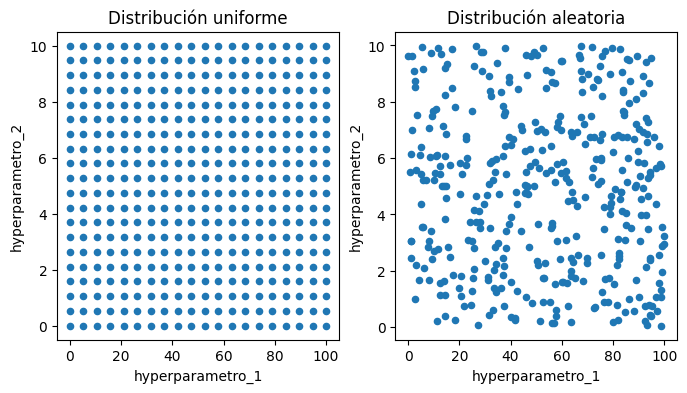

In [57]:
from itertools import product

fig, axs = plt.subplots(nrows = 1, ncols = 2,figsize=(8, 4),
                        sharex = True, sharey = False)

hyperparametro_1 = np.linspace(start = 0, stop = 100, num=20)
hyperparametro_2 = np.linspace(start = 0, stop = 10, num=20)

combinaciones = [list(x) for x in product(hyperparametro_1, hyperparametro_2)]
combinaciones = pd.DataFrame.from_records(
                    combinaciones,
                    columns=['hyperparametro_1', 'hyperparametro_2']
                )

combinaciones.plot(
    x    = 'hyperparametro_1',
    y    = 'hyperparametro_2',
    kind = 'scatter',
    ax   = axs[0]
)
axs[0].set_title('Distribución uniforme')

hyperparametro_1 = np.random.uniform(low = 0, high = 100, size  = 400)
hyperparametro_2 = np.random.uniform(low = 0, high = 10, size  = 400)

combinaciones = pd.DataFrame(
                    {
                    'hyperparametro_1': hyperparametro_1,
                    'hyperparametro_2': hyperparametro_2,
                    }
                )
combinaciones.plot(
    x    = 'hyperparametro_1',
    y    = 'hyperparametro_2',
    kind = 'scatter',
    ax   = axs[1]
)
axs[1].set_title('Distribución aleatoria')

In [58]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

param_distributions = {'modelo__alpha': np.logspace(-5, 3, 100)}

grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
1,4.534879,-57119.796192,3404.832832,-55954.309045,837.008354


In [59]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

espacio_busqueda  = [Real(1e-6, 1e+3, "log-uniform", name='modelo__alpha')]

@use_named_args(espacio_busqueda)
def objective(**params):
    pipe.set_params(**params)
    return -np.mean(cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_root_mean_squared_error"))

resultados_opt = gp_minimize(
                    func         = objective,
                    dimensions   = espacio_busqueda,
                    n_calls      = 50,
                    random_state = 0
                )

print(f"Mejor score validación: {resultados_opt.fun}")
print(f"Mejores hiperparámetros: {list(zip([x.name for x in espacio_busqueda], resultados_opt.x))}")

Mejor score validación: 56904.58147882783
Mejores hiperparámetros: [('modelo__alpha', 4.857033357249682)]


<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

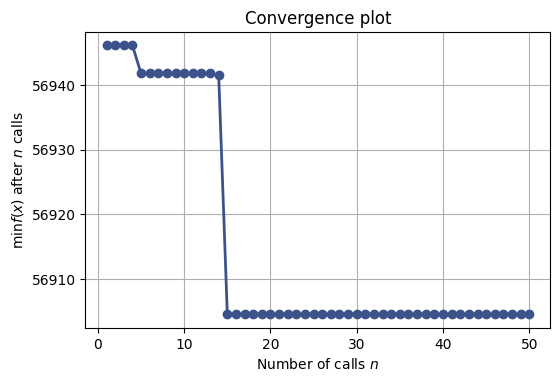

In [60]:
fig, ax = plt.subplots(figsize=(6, 3.84))
plot_convergence(resultados_opt, ax = ax)

In [62]:
import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    
    modelo__alpha = trial.suggest_float("modelo__alpha", 1e-6, 1e+3, log=True)
    pipe.set_params(**{'modelo__alpha':modelo__alpha})
    score = -np.mean(cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_root_mean_squared_error"))
    return score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, show_progress_bar=True)
print(study.best_trial)
print("")
print(f"Mejor score validación: {study.best_value}")
print(f"Mejores hiperparámetros: {study.best_params}")

c:\Mis Proyectos\Git\Kaggle\Avalon\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Best trial: 41. Best value: 56904.6: 100%|██████████| 50/50 [00:05<00:00,  8.60it/s]

FrozenTrial(number=41, state=1, values=[56904.58338189327], datetime_start=datetime.datetime(2024, 3, 18, 16, 45, 27, 448098), datetime_complete=datetime.datetime(2024, 3, 18, 16, 45, 27, 476286), params={'modelo__alpha': 4.814532502331467}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'modelo__alpha': FloatDistribution(high=1000.0, log=True, low=1e-06, step=None)}, trial_id=41, value=None)

Mejor score validación: 56904.58338189327
Mejores hiperparámetros: {'modelo__alpha': 4.814532502331467}


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector

numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

pipe = Pipeline(
        [('preprocessing', preprocessor),
        ('interactions', PolynomialFeatures(degree=2)),
        ('modelo', Ridge())])

param_grid = {'interactions': [PolynomialFeatures(degree=2), 'passthrough'],
              'modelo__alpha': np.logspace(-5, 3, 10)}

grid = GridSearchCV(
        estimator  = pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_interactions,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
8,PolynomialFeatures(),129.154967,-57056.731147,3892.978712,-51261.298296,884.997428


In [64]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', KNeighborsRegressor())])

param_distributions = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
12,7,-61341.037782,3899.559043,-52866.104052,1123.238826


Text(0, 0.5, 'neg_root_mean_squared_error')

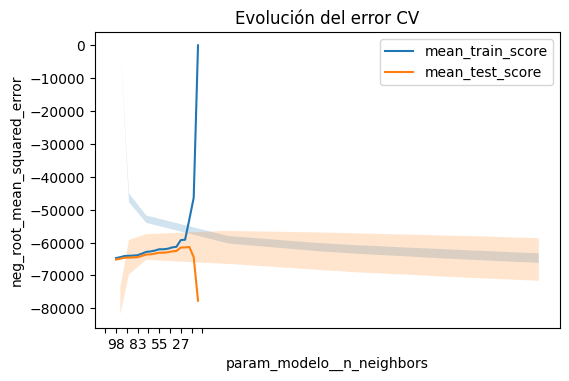

In [65]:
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__n_neighbors'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica)

Text(0, 0.5, 'neg_root_mean_squared_error')

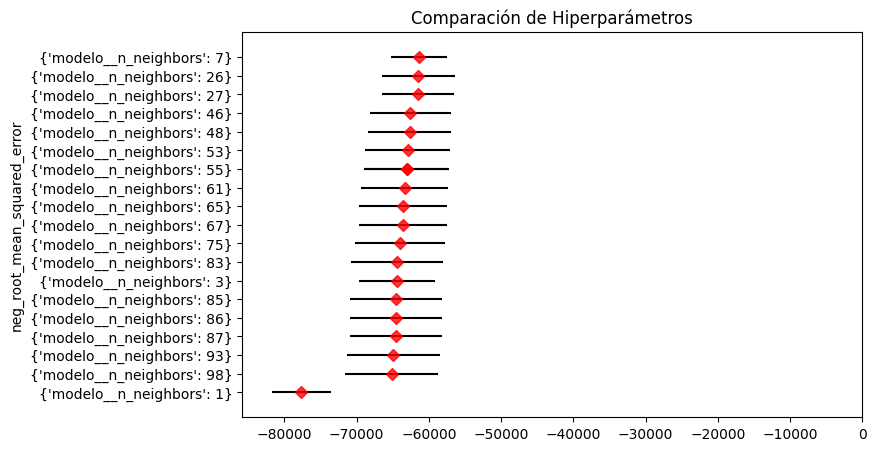

In [66]:
fig, ax = plt.subplots(figsize=(8, 5))
resultados = resultados.sort_values('mean_test_score', ascending = True)
ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_ylabel(metrica)

In [67]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_knn = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print(f"El error (rmse) de test es: {rmse_knn}")

El error (rmse) de test es: 67303.99640453797


c:\Mis Proyectos\Git\Kaggle\Avalon\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [68]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
10,3.396739,-56918.023084,4558.448092,-55948.039752,1149.940951


Text(0, 0.5, 'neg_root_mean_squared_error')

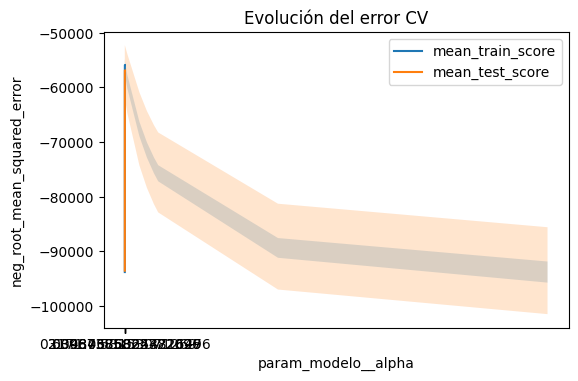

In [69]:
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica)

In [70]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_lm}")

El error (rmse) de test es: 65406.82894279458


c:\Mis Proyectos\Git\Kaggle\Avalon\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [71]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])


param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
}

grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
12,2000,7,20,-54184.094216,4585.626849,-20190.558589,391.249969


In [72]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_rf = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_rf}")

El error (rmse) de test es: 61287.39698177476


c:\Mis Proyectos\Git\Kaggle\Avalon\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingRegressor())])

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth'   : [None, 3, 5, 10, 20],
    'modelo__subsample'   : [0.5,0.7, 1]
}

grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__subsample,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
4,0.7,1000,7,3,-54392.939432,4333.666927,-16051.575318,333.85085


In [74]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_gbm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_gbm}")

El error (rmse) de test es: 61916.56233646682


c:\Mis Proyectos\Git\Kaggle\Avalon\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [75]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

pipe_ridge = Pipeline([('preprocessing', preprocessor),
                     ('ridge', Ridge(alpha=3.4))])

pipe_rf = Pipeline([('preprocessing', preprocessor),
                     ('random_forest', RandomForestRegressor(
                                         n_estimators = 1000,
                                         max_features = 7,
                                         max_depth    = 20
                                        )
                     )])

In [76]:
estimators = [('ridge', pipe_ridge),
              ('random_forest', pipe_rf)]

stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())

_ = stacking_regressor.fit(X = X_train, y = y_train)

In [77]:
modelo_final = stacking_regressor
predicciones = modelo_final.predict(X = X_test)
rmse_stacking = mean_squared_error(
                    y_true  = y_test,
                    y_pred  = predicciones,
                    squared = False
                  )
print(f"El error (rmse) de test es: {rmse_stacking}")

El error (rmse) de test es: 60829.249936653985


c:\Mis Proyectos\Git\Kaggle\Avalon\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0.5, 0, 'Test rmse')

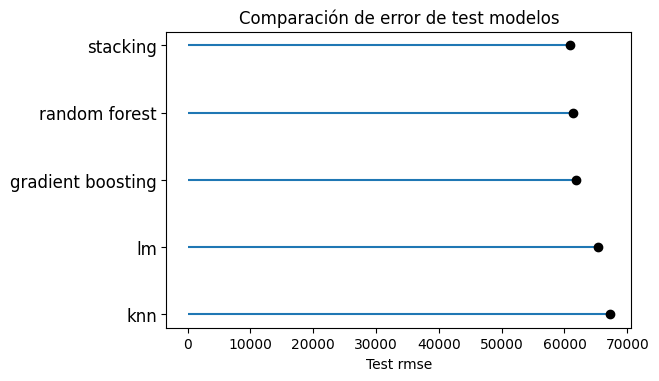

In [78]:
error_modelos = pd.DataFrame({
                        'modelo': ['knn', 'lm', 'random forest', 'gradient boosting',
                                   'stacking'],
                        'rmse': [rmse_knn, rmse_lm, rmse_rf, rmse_gbm, rmse_stacking]
                     })
error_modelos = error_modelos.sort_values('rmse', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse)
ax.plot(error_modelos.rmse, error_modelos.modelo, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos'),
ax.set_xlabel('Test rmse')